### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
 nb_fname = "IHA2.ipynb"
    

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Hariharan Gopinath" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). You can download the dataset from Kaggle but you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [7]:
# YOUR CODE HERE
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#To Convolutional Neural Network

import torch.nn as nn
import torch.nn.functional as F

#Define a Loss function and optimizer
import torch.optim as optim


## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [8]:
# YOUR CODE HERE

df = pd.read_csv("300k.csv")


E:\anaconda\envs\dml\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [10]:
# YOUR CODE HERE
# columns to take out 
split=['latitude','longitude','class']
df_new=df[split]
df_new.count()

latitude     296021
longitude    296021
class        296021
dtype: int64

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [11]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [12]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [13]:
# YOUR CODE HERE
Diglett_number=name_dict['Diglett']
Seel_number=name_dict['Seel']
Tauros_number=name_dict['Tauros']
loaded_data=df_new[df_new['class'].isin([Diglett_number, Seel_number,Tauros_number])]
loaded_data.count()

latitude     2083
longitude    2083
class        2083
dtype: int64

In [14]:
loaded_data

,latitude,longitude,class
90,49.146199,-122.638105,50
137,44.476769,-73.212749,128
225,39.767486,-86.161068,128
550,49.999197,9.066973,86
629,25.724382,-100.379311,50
...,...,...,...
294822,34.190725,-118.490821,128
294909,34.189895,-118.490000,86
295194,53.555035,-0.087039,86
295436,34.186898,-118.488905,86


In [15]:
Tauros=df_new[df_new['class'].isin([Tauros_number])]
Tauros_data=Tauros[['class']]
Seel=df_new[df_new['class'].isin([Seel_number])]
Seel_data=Seel[['class']]
Diglett=df_new[df_new['class'].isin([Diglett_number])]
Diglett_data=Diglett[['class']]



In [16]:
#three=df_new[df_new['class'].isin([Diglett,Tauros,Seel])]

In [17]:
#three

In [18]:
print(Tauros_data.count())
print(Seel_data.count())
print(Diglett_data.count())

class    670
dtype: int64
class    692
dtype: int64
class    721
dtype: int64


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

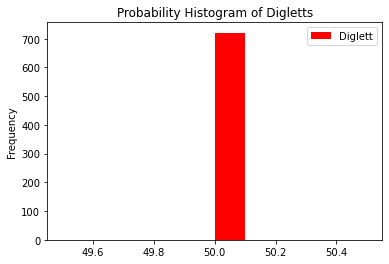

In [19]:
# YOUR CODE HEREl




plt.hist(Diglett_data,bins=10 ,color='red',label='Diglett')

plt.gca().set(title='Probability Histogram of Digletts', ylabel='Frequency')

plt.legend();





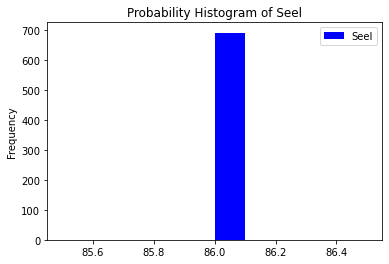

In [20]:
plt.hist(Seel_data,bins=10,color='blue' ,label='Seel')
plt.gca().set(title='Probability Histogram of Seel',ylabel='Frequency')

plt.legend();


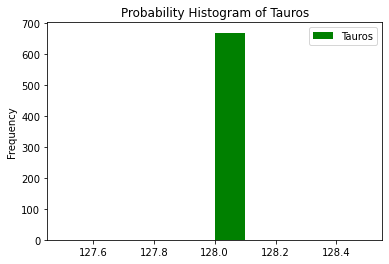

In [21]:
plt.hist(Tauros_data,bins=10,color='green',label='Tauros')
plt.gca().set(title='Probability Histogram of Tauros', ylabel='Frequency')
plt.legend();


Is the dataset balanced?

**Your answer:** (fill in here)
_______________________________________________________________________________________________________________________________

**The data set is almost well balanced because the no of occurency/Frequency of the three specific pokemon: Diglett, Seel, and Tauros are 670,692 and 721. If we see these distribution, ti almost looks like a same and with some difference in the height of the histogram**

_______________________________________________________________________________________________________________________________


Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

Text(0, 0.5, 'longitude')

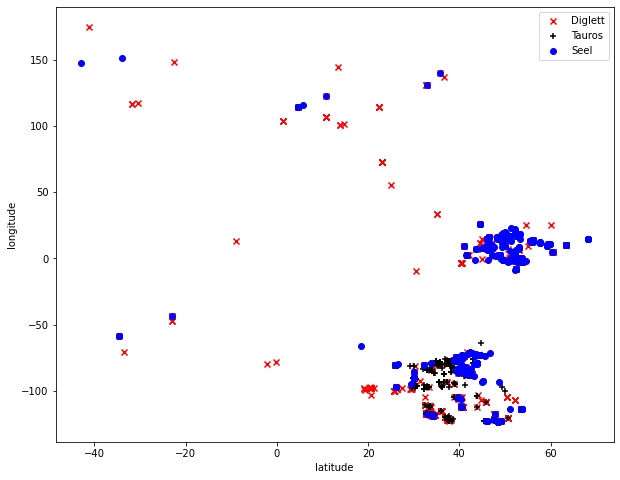

In [22]:
# YOUR CODE HERE

fig, ax = plt.subplots(figsize=(10,8))

# Scatter for Diglett
ax.scatter(Diglett['latitude'],Diglett['longitude'], color = "r", marker = "x", label = "Diglett")
# Scatter for Tauros
ax.scatter(Tauros['latitude'],Tauros['longitude'], color = "k", marker = "+", label = "Tauros")
# Scatter for Seel
ax.scatter(Seel['latitude'],Seel['longitude'], color = "b", marker = "o", label = "Seel")

ax.legend()
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** (fill in here)



In [23]:
vis_data=df_new[df_new['class'].isin([Diglett_number, Seel,Tauros_number])]
#df_new
vis_data

,latitude,longitude,class
90,49.146199,-122.638105,50
137,44.476769,-73.212749,128
225,39.767486,-86.161068,128
629,25.724382,-100.379311,50
977,43.708274,-79.399741,128
...,...,...,...
294322,49.158007,-123.016853,128
294438,26.237014,-98.195712,50
294447,36.810507,-119.854716,50
294822,34.190725,-118.490821,128


In [25]:
vis_data2=vis_data
# .drop(columns=['label'])

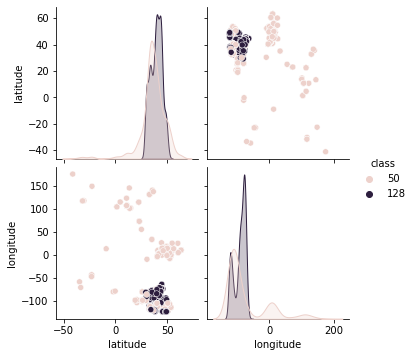

In [26]:

import seaborn as sns
sns.pairplot(vis_data2, hue='class');


How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** (fill in here)

_______________________________________________________________________________________________________________________________

**I think the problem is bit hard and difficult to visualize the 3 different classes of pokemon. Because the pokemon Tauros made as a cluster in the bottom right corner and the pokemon seel has it's most of the cluster in one place and some with the Tauros cluster.But if we see the pokemon Diglett, it has its clusters mingled with the other 2 pokemons steel and Tauros. So,it's difficult to visual this problem to find out the single prokemon and I believe it will lead to the over fitting of our neural networks in future**

_______________________________________________________________________________________________________________________________


Which accuracy do you expect to achieve?

**Your answer:** (fill in here)

_______________________________________________________________________________________________________________________________

**From the above discussion, we can say that the accuracy of the Tauros can be high when comparing with the other 2 pokemans because it's easy to differentiate with other 2 and the accuracy of the seel is better than the Diglett. Because the Diglett was spreaded more than the seel so the accuracy of the Diglett pokeman will be lower**

_______________________________________________________________________________________________________________________________


## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [27]:
Diglett_number=name_dict['Diglett']
Seel_number=name_dict['Seel']
Tauros_number=name_dict['Tauros']

Tauros_number

128

In [28]:
# YOUR CODE HERE

# before we split the dataset, we have to create the output label for the 3 classes
#Diglett-->0
#Seel-->1 
#Tauros--> 2

# creating a empty data series for label
df_new['label'] =  pd.DataFrame({'label' : []})

df_new.loc[df_new['class'] == Diglett_number, 'label'] = 0 #if the pokemon is Diglett then label is 0
df_new.loc[df_new['class'] == Seel_number, 'label'] = 1 #if the pokemon is Seel then label is 1
df_new.loc[df_new['class'] == Tauros_number, 'label'] = 2 #if the pokemon is Tauros then label is 2

df_new['label']

labelled=df_new[df_new['class'].isin([Tauros_number,Seel_number,Diglett_number])]


E:\anaconda\envs\dml\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
E:\anaconda\envs\dml\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
Xdata = labelled[['latitude','longitude']].values


y=labelled[['label']].values
Ydata = np.array(list(y))
Ydata

array([[0.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [30]:
# Function to map the classes to numbers
def encode_PM(PM):
    if name_dict[PM] == 'Diglett':
        return 0
    if name_dict[PM] == 'Seel':
        return 1
    if name_dict[PM] == 'Tauros':
        return 2
    else:
        raise ValueError('pokemon \'{}\' is not recognized.'.format(PM))
        


In [31]:



temp = map(encode_PM, loaded_data['class'].values)
temp

In [32]:
Ydata = np.array(list(temp))
print(len(Ydata))

2083


In [33]:
Ydata

array([0, 2, 2, ..., 1, 1, 2])

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [34]:
# YOUR CODE HERE
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader




# Here we have to split the data into train,val and test datas

# Split the training data from validate and test set - 55% for the training set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata, test_size =0.45, random_state=10)

#Split the validation and test set - 25% has validation set and test set has 20% 
Xvalid, Xtest, Yvalid, Ytest = train_test_split(Xtest, Ytest, test_size = 0.20/0.45, random_state=10)
                                                    

# Change our data from Numpy arrays to Torch tensors
#In order for autograd to work, we first need to change our data from Numpy arrays to Torch tensors.
x_train = torch.tensor(Xtrain, dtype=torch.float32)
y_train = torch.tensor(Ytrain, dtype=torch.int64)

x_val = torch.tensor(Xvalid, dtype=torch.float32)
y_val = torch.tensor(Yvalid, dtype=torch.int64)

x_test = torch.tensor(Xtest, dtype=torch.float32)
y_test = torch.tensor(Ytest, dtype=torch.int64)


print(type(Ytrain))

<class 'numpy.ndarray'>


In [35]:
print('The length of the total data set is',len(Xdata))
print('The length of the training set is',len(x_train))
print('The length of the Validation set is',len(x_val))
print('The length of the Test set is',len(x_test))
x_test.shape

The length of the total data set is 2083
The length of the training set is 1145
The length of the Validation set is 521
The length of the Test set is 417


torch.Size([417, 2])

In [36]:
x_train

tensor([[  52.1368,   -8.6411],
        [  50.0705,   14.4673],
        [  49.1460, -122.6410],
        ...,
        [  40.0302, -105.2675],
        [  29.9412,  -90.0689],
        [  44.0828, -103.2269]])

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [56]:
# YOUR CODE HERE
from torch import nn

# the below codes are taken fron the CL2

# learnng rate
lr        = 0.01234
# number of epochs
epoch=30
# batch size for train and val
batchsize_train = 100
batchsize_val = 150


from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader




train_dataset = TensorDataset(x_train, y_train)
train_t_data_loader = DataLoader(train_dataset, batch_size=batchsize_train, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_t_data_loader = DataLoader(val_dataset, batch_size=batchsize_val, shuffle=True)



# Our model inherits from `nn.Module`, just as with the `LinearRegressor` in CL1.
class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2,3)
        self.linear2 = nn.Linear(3,3)

    def forward(self, x):
        # the output from the first layer should be sent to the relu activation function
        x = F.relu(self.linear1(x))
        return self.linear2(x)
    

# Define the model

loss_fn = nn.CrossEntropyLoss()


# Reset the model and the optimizer
model = LogisticRegressor()
optimizer = optim.Adam(model.parameters(), lr)



for epoch in range(epoch):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in train_t_data_loader:
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(train_dataset)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_t_data_loader:
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(val_dataset)
        val_avg_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {}'
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f}'
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))
    
    ################################################3
    
     
    
        


Epoch 0	Loss: 1.908 	Loss (val): 0.987	Accuracy: 0.49	Accuracy (val): 0.35
Epoch 1	Loss: 0.984 	Loss (val): 0.968	Accuracy: 0.50	Accuracy (val): 0.59
Epoch 2	Loss: 0.933 	Loss (val): 0.868	Accuracy: 0.61	Accuracy (val): 0.67
Epoch 3	Loss: 0.861 	Loss (val): 0.832	Accuracy: 0.62	Accuracy (val): 0.64
Epoch 4	Loss: 0.845 	Loss (val): 0.806	Accuracy: 0.61	Accuracy (val): 0.65
Epoch 5	Loss: 0.833 	Loss (val): 0.812	Accuracy: 0.62	Accuracy (val): 0.65
Epoch 6	Loss: 0.835 	Loss (val): 0.813	Accuracy: 0.62	Accuracy (val): 0.64
Epoch 7	Loss: 0.813 	Loss (val): 0.813	Accuracy: 0.62	Accuracy (val): 0.66
Epoch 8	Loss: 0.809 	Loss (val): 0.790	Accuracy: 0.62	Accuracy (val): 0.67
Epoch 9	Loss: 0.804 	Loss (val): 0.791	Accuracy: 0.61	Accuracy (val): 0.65
Epoch 10	Loss: 0.801 	Loss (val): 0.777	Accuracy: 0.61	Accuracy (val): 0.64
Epoch 11	Loss: 0.798 	Loss (val): 0.790	Accuracy: 0.62	Accuracy (val): 0.63
Epoch 12	Loss: 0.796 	Loss (val): 0.779	Accuracy: 0.62	Accuracy (val): 0.66
Epoch 13	Loss: 0.808 	

Train the network.

In [57]:
# YOUR CODE HERE

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [58]:
# YOUR CODE HERE
test_samples = torch.tensor(x_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

preds = model(test_samples).argmax(dim=1)

acc = (preds == test_labels).sum().item()/len(preds)
print("Accuracy: %.2f" % acc)

Accuracy: 0.68


E:\anaconda\envs\dml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
E:\anaconda\envs\dml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Compute the confusion matrix of your predictions on the test set.

In [59]:
# YOUR CODE HERE

from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, preds)

array([[ 76,  29,  41],
       [  7,  97,  41],
       [ 16,   0, 110]], dtype=int64)

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)
______________________________________________________________________________________________________________________________

***From the 56% accuracy with the test dataset, we can say that the model can detect the Tauros and Seel pretty well but not for the Digletts. From the section 2 scatter plot, we can see that the Digletts is spreaded with the other 2 pokemons. Therefore, This model finding difficulty in finding the pokemon Digletts in that cluster and it correctly classifed only 6 Digletts pokemons and it misclassified as other pokemons.***



______________________________________________________________________________________________________________________________

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

Red region indicates Diglett region
black region indicates tauros region
blue region indicates seel region


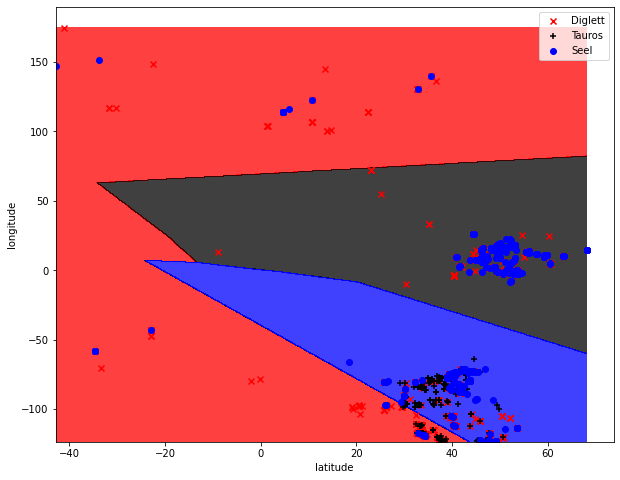

In [60]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

#2. Generate decision surface boundaries
#min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
#min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary

# 1-latitude
# 2-longitude

max1 = loaded_data['latitude'].values.max()
max2 = loaded_data['longitude'].values.max()

min1 = loaded_data['latitude'].values.min()
min2 = loaded_data['longitude'].values.min()

#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)


#4. Convert into vector 
x_grid, y_grid = np.meshgrid(x_scale, y_scale)

x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))

grid = np.hstack((x_g, y_g))

torch_x_test = torch.tensor(grid, dtype=torch.float32)


# make predictions for the grid
y_pred_2 = model(torch_x_test).argmax(dim=1).reshape(x_grid.shape)


fig, ax = plt.subplots(figsize=(10,8))


#8. set the plot size
#plt.figure(figsize=(20,10))
#9. plot the contour function

plt.contourf(x_grid, y_grid, y_pred_2,alpha = 0.75,cmap = ListedColormap(('red', 'black','blue')))



# Scatter for Diglett
ax.scatter(Diglett['latitude'],Diglett['longitude'], color = "r", marker = "x", label = "Diglett")
# Scatter for Tauros
ax.scatter(Tauros['latitude'],Tauros['longitude'], color = "k", marker = "+", label = "Tauros")
# Scatter for Seel
ax.scatter(Seel['latitude'],Seel['longitude'], color = "b", marker = "o", label = "Seel")


ax.legend()
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
print("Red region indicates Diglett region")
print("black region indicates tauros region")
print("blue region indicates seel region")

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** (fill in here)

**The decision plots looks like reasonable because we can see the large red region which indicates the Diglett pokemon spreaded lot when comparing with other pokemons and after that seel, which got clustered in two regions and it's second largest region. For the tauros, it clustered in one particular region and it got less region occupied when comparing with other pokemons.**

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)

______________________________________________________________________________________________________________________________

**From the confusion matrix and the scatter plots, we can see that the pokemon Digletts is difficult to caught because it was spreaded over all the places in the graph and classification of the seel and Tuaros are bit easy when comparing with the Digletts. So if we start caughting the other 2 pokemons first, then we can easily capture out the Digletts pokemon.**



______________________________________________________________________________________________________________________________


Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)

______________________________________________________________________________________________________________________________

**From the main dataset, there are many features that we can use to improve the performance of our classifier. Here, I am using a three features like temperature , weather and windspeed because I believe the weather factors play a major in finding the pokemon. Hence, we can predict a clue exactly when it has highest probability to find and catch the three pokemons.**



______________________________________________________________________________________________________________________________


To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [61]:
# YOUR CODE HERE
dataset = df[['weather', 'pokestopIn100m', 'temperature','population_density','class','windSpeed']]

Diglett_data=dataset[dataset['class'].isin([Diglett_number])]
Seel_data=dataset[dataset['class'].isin([Seel_number])]
Tauros_data=dataset[dataset['class'].isin([Tauros_number])]


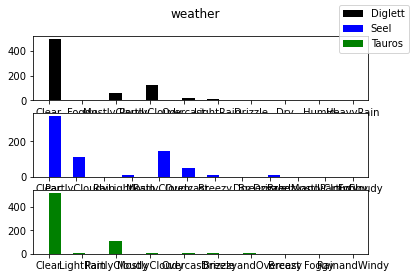

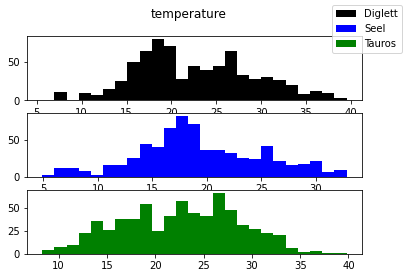

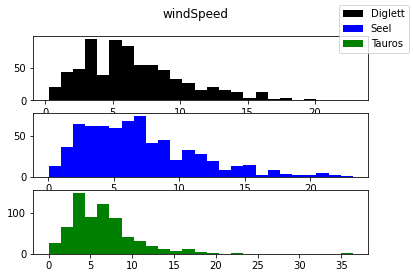

In [62]:

# weather plot for the 3 pokemons
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(Diglett_data['weather'], bins=25, color = 'k', label = 'Diglett')
ax2.hist(Seel_data['weather'], bins=25, color = 'b', label = 'Seel')
ax3.hist(Tauros_data['weather'], bins=25, color = 'g', label = 'Tauros')
fig.suptitle('weather')
fig.legend()




# temperature plot for the 3 pokemons
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(Diglett_data['temperature'], bins=25, color = 'k', label = 'Diglett')
ax2.hist(Seel_data['temperature'], bins=25, color = 'b', label = 'Seel')
ax3.hist(Tauros_data['temperature'], bins=25, color = 'g', label = 'Tauros')
fig.suptitle('temperature')
fig.legend()



# windSpeed plot for the 3 pokemons
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(Diglett_data['windSpeed'], bins=25, color = 'k', label = 'Diglett')
ax2.hist(Seel_data['windSpeed'], bins=25, color = 'b', label = 'Seel')
ax3.hist(Tauros_data['windSpeed'], bins=25, color = 'g', label = 'Tauros')
fig.suptitle('windSpeed')
fig.legend()



What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)

________________________________________________________________________________________________________________________________

**Here, we have plotted the three different plots of temperature, pressure and weather factors for the three different pokemons Diglett, Seel, and Tauros.**

**From the weather histogram, We can clearly see that all the 3 pokemons has one common feature in the weather factor. Mostly, 90 percent of the pokemons can be found if we go on a clear weather rather than other climatic conditions like rain,snow,fog, etc. So, If we sort out the pokemons that we can find in the clear weather, then the accuarcy of the model can be increased well and easy to find the pokemons.**

**From the Temperature histogram, We can clearly see that all the 3 pokemons has one common feature lin the temperature factor. Mostly of the pokemons can be found if we go on a temperature between 15-30 degree celcius rather than other very low temperature conditions. I have observed 20 degree celsius is the optimal mean temperature for finding the pokemons. So, If we sort out the pokemons that we can find in the 15-30 degree celcius of temperature, then the accuarcy of the model can be increased well and easy to find the pokemons.**


**From the Windspeed histogram, We can clearly see that all the 3 pokemons has one common feature lin the temperature factor. Mostly of the pokemons can be found if we go on a temperature between 15-30 degree celcius rather than other very low temperature conditions. I have observed 20 degree celsius is the optimal mean temperature for finding the pokemons. So, If we sort out the pokemons that we can find in the 15-30 degree celcius of temperature, then the accuarcy of the model can be increased well and easy to find the pokemons.**

**The last histogram diagram tells that the windspeed of 5km/hr would be the optimal one to find a pokemon and we have the highest probability to catch these three pokemons. However, In windspeed of 5-10km/hr, they do appear pretty often too.**
________________________________________________________________________________________________________________________________


The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

**When we take a regression problem and a classification problem, we have both pros and cons. I believe that the regression preditive problem is a task of approximating a mapping function from input variables (X) to a continuous output variable (y). And the contineous output could be a numerical numbers values like price or amount.** 

**The classification problem is a task of approximating a mapping function (f) from input variables (X) to discrete output variables(y). These discrete outputs may be the probabilites of the labels or any catagories. For example whether it is a cat or dog.**

**In our problem the regression model will suit for a suitation like given a certain longitude and tells me at what latitude we should to find a pokemon and this could be like a prediting a certain numerical values. But it is not useful to find any one class of pokemon with the given data. To over come this, the classification model would be more useful for finding the particular class of the pokemon as seen in the scatter plot**

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE